In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from Excel
df = pd.read_excel('projectDataset.xlsx')

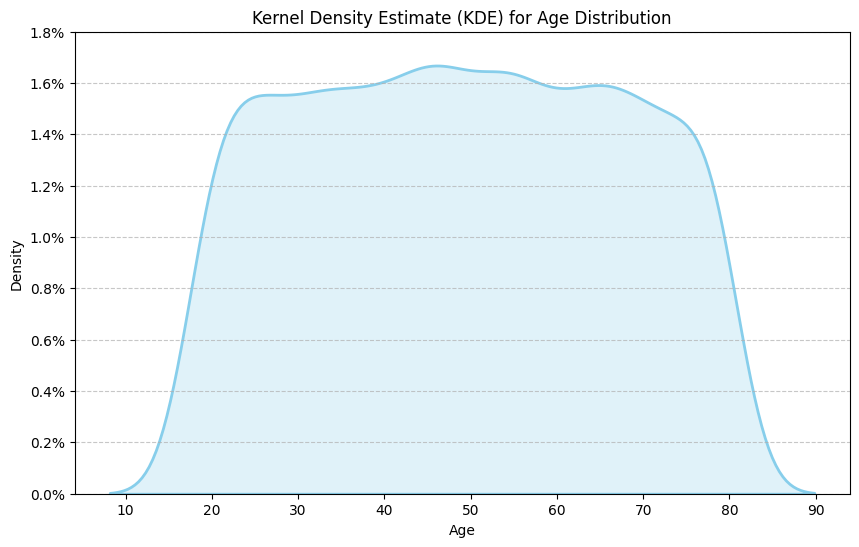

In [17]:
# KDE Plot for Age Distribution
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(df['Age'], fill=True, color='skyblue', linewidth=2)
yTicks = ax.get_yticks()
yTicksPercent = [f'{tick * 100:.1f}%' for tick in yTicks]
ax.set_yticks(yTicks)
ax.set_yticklabels(yTicksPercent)

plt.title('Kernel Density Estimate (KDE) for Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

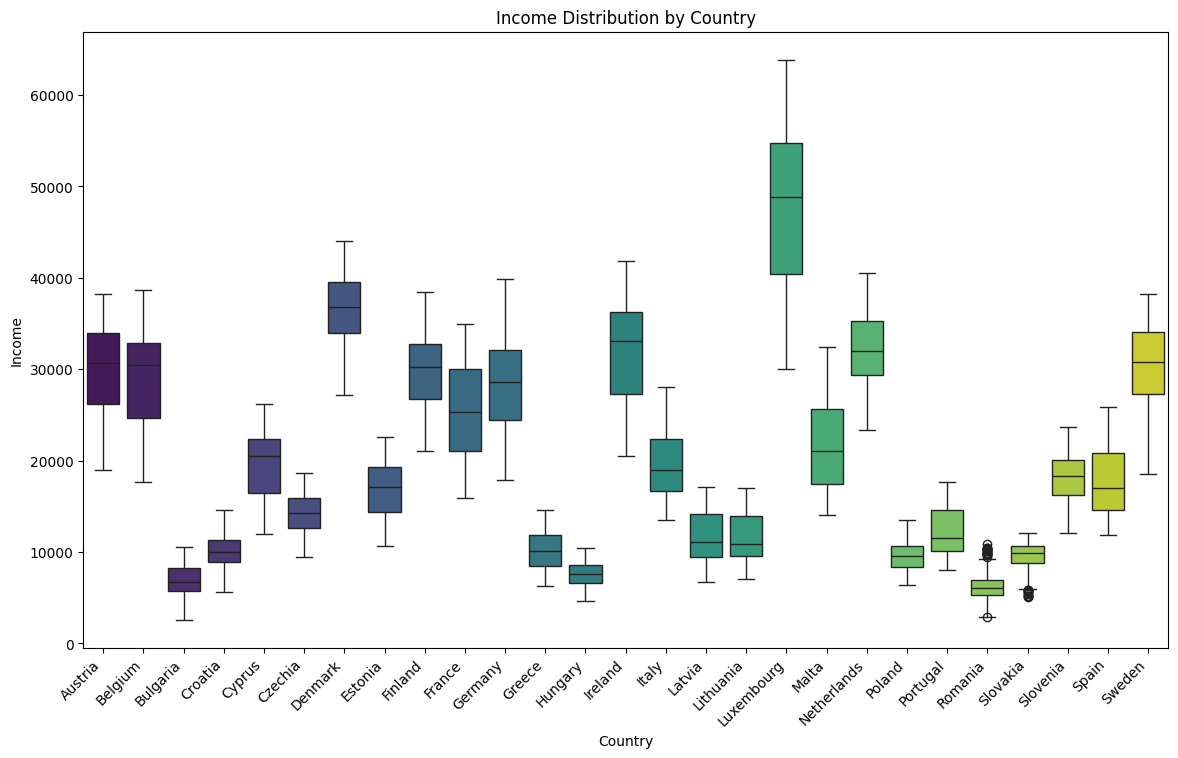

In [18]:
# Boxplot for Income Distribution by Country
dfSorted = df.sort_values(by='Country')

# Boxplot for Income Distribution by Country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='Income', data=dfSorted, palette='viridis', hue='Country', dodge=False)
plt.title('Income Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Income')
plt.xticks(rotation=45, ha='right')
plt.show()

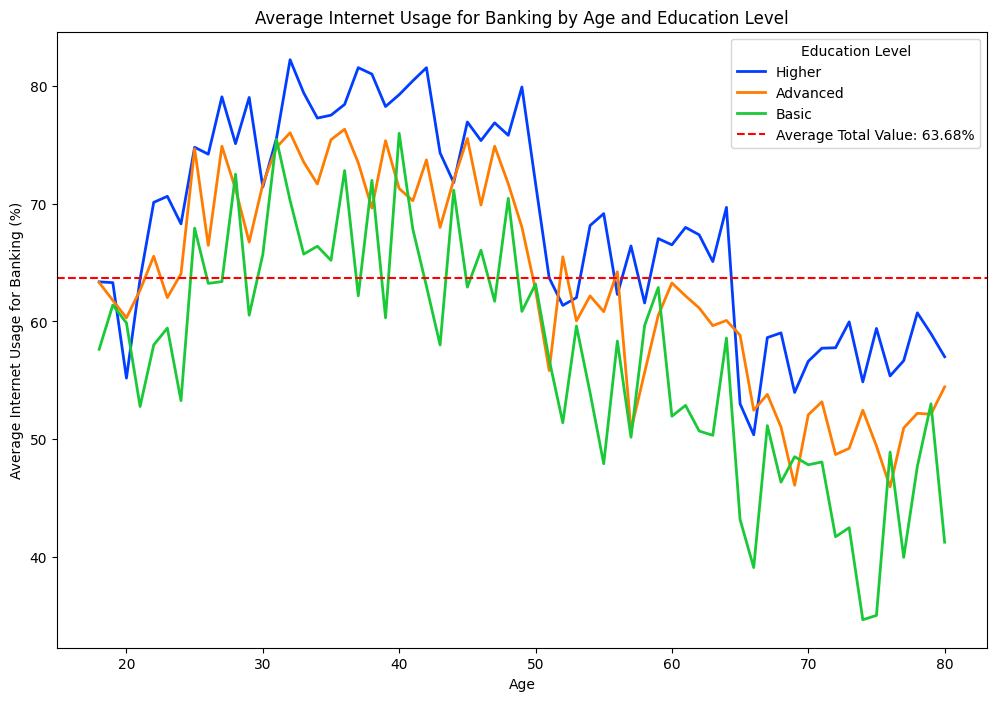

In [35]:
# Line plot for Average Internet Usage for Banking by Age and Education Level

# Calculate the average total value
averageTotalValue = df['Internet Usage for Banking (%)'].mean()

# Define the order for the legend items
legendOrder = ['Higher', 'Advanced', 'Basic']

# Line plot for Average Internet Usage for Banking by Age and Education Level
plt.figure(figsize=(12, 8))
sns.lineplot(x='Age', y='Internet Usage for Banking (%)', hue='Education Level', data=df, palette='bright', errorbar=None, linewidth=2)
plt.axhline(y=averageTotalValue, color='red', linestyle='--', label='Average Total Value')

# Customize the legend order and include the average total value
handles, labels = plt.gca().get_legend_handles_labels()
newHandles, newLabels = [], []
for orderLabel in legendOrder:
    index = labels.index(orderLabel)
    newHandles.append(handles[index])
    newLabels.append(labels[index])
newHandles.append(plt.Line2D([0], [0], color='red', linestyle='--'))
newLabels.append(f'Average Total Value: {averageTotalValue:.2f}%')

plt.legend(newHandles, newLabels, title='Education Level', bbox_to_anchor=(1, 1))

plt.title('Average Internet Usage for Banking by Age and Education Level')
plt.xlabel('Age')
plt.ylabel('Average Internet Usage for Banking (%)')
plt.show()

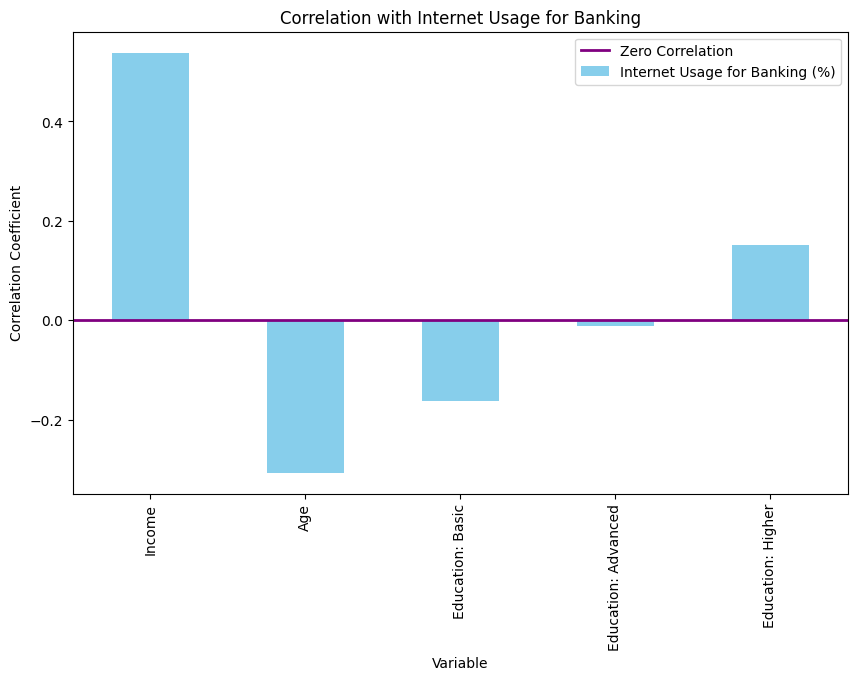

In [20]:
# Bar plot to visualize the correlation of 'Internet Usage for Banking (%)' with other variables

# Select relevant columns
selectedColumns = ['Income', 'Age', 'Internet Usage for Banking (%)', 'Education Level']
dfSelected = df[selectedColumns]

# Convert categorical variable 'Education Level' into numerical values
dfSelected = pd.get_dummies(dfSelected, columns=['Education Level'])

# Calculate the correlation of 'Internet Usage for Banking (%)' with other variables
correlationWithInternetUsage = dfSelected.corr()['Internet Usage for Banking (%)'].drop('Internet Usage for Banking (%)')

# Re-order the x-axis categories
desiredOrder = ['Income', 'Age', 'Education Level_Basic', 'Education Level_Advanced', 'Education Level_Higher']
correlationWithInternetUsage = correlationWithInternetUsage.loc[desiredOrder]

# Rename the Education Level categories
correlationWithInternetUsage = correlationWithInternetUsage.rename({
    'Education Level_Basic': 'Education: Basic',
    'Education Level_Advanced': 'Education: Advanced',
    'Education Level_Higher': 'Education: Higher'
})

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = correlationWithInternetUsage.plot(kind='bar', color='skyblue')
plt.title('Correlation with Internet Usage for Banking')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Variable')

# Add a horizontal line at y=0 for zero correlation
ax.axhline(0, color='purple', linestyle='solid', linewidth=2, label='Zero Correlation')

plt.legend()
plt.show()